In [6]:
import pandas as pd

# Load datasets
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

# Display the first few rows of each dataframe to check the structure
print("Fake DataFrame:")
print(fake_df.head())

print("True DataFrame:")
print(true_df.head())


Fake DataFrame:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
True DataFrame:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...

In [7]:
# Add label columns
fake_df['label'] = 'fake'
true_df['label'] = 'true'

# Display the first few rows to check the new column
print("Fake DataFrame with Label:")
print(fake_df.head())

print("True DataFrame with Label:")
print(true_df.head())


Fake DataFrame with Label:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
True DataFrame with Label:
                                               tit

In [8]:
# Combine datasets
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

# Display basic information about the combined DataFrame
print("Combined DataFrame:")
print(combined_df.shape)  # Print the shape (rows, columns)
print(combined_df.head())  # Print the first few rows
print(combined_df.tail())  # Print the last few rows
print(combined_df['label'].value_counts())  # Print value counts of the labels


Combined DataFrame:
(45687, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
                                                   title  \
45682  'Fully

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Removing stop words and punctuation, and stemming
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Apply preprocessing to the text column
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Display the cleaned text
print("Sample Cleaned Text:")
print(combined_df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Cleaned Text:
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  
2  friday reveal former milwauke sheriff david cl...  
3  christma day donald trump announc would back w...  
4  pope franci use annual christma day messag reb...  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(combined_df['cleaned_text'])

# Display shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:")
print(X.shape)  # Should be (number_of_samples, number_of_features)


TF-IDF Matrix Shape:
(45687, 75435)


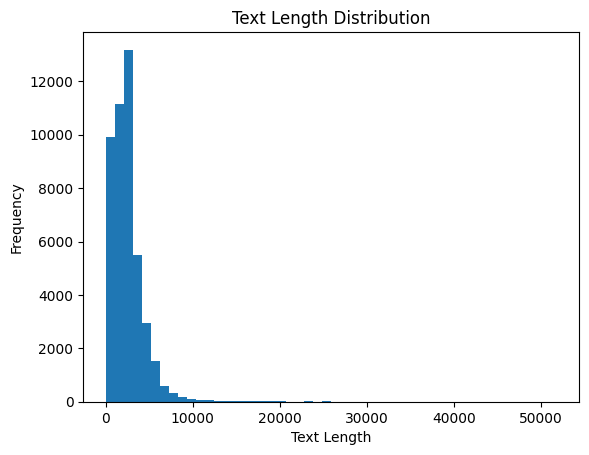

In [12]:
import matplotlib.pyplot as plt

# Plot text length distribution
combined_df['text_length'] = combined_df['text'].apply(len)
plt.hist(combined_df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
